## EECS 531 Assignment 2

Due Friday March 27 before midnight. 100 points total.

### Submitting assignments to Canvas

- You can use this notebook as a starting point for completing the assignment.
- For jupyter notebooks, submit the .ipynb file and a pdf export of the notebook.
- Make sure you check that the pdf export represents the latest state of your notebook and that the equations and figures are properly rendered.

- If you decide not to a notebook, writeup your assignment using latex and submit a pdf with your code.  The writeup should include relevant code with description if it can fit on a page.  

- Use the following format for filenames:
  - `EECS531-A2-yourcaseid.ipynb`
  - `EECS531-A2-yourcaseid.pdf`

- If you have more than these two files, put any additional files in a directory named `EECS531-A2-yourcaseid`. Do not include binaries or large data files. Then zip this directory and submit it with the name `EECS531-A2-yourcaseid.zip`.  Do not use other compression formats.  The `.ipynb` file can be included in the zipped directory, but make sure you submit the `.pdf` file along with the `.zip` file.  This is so it appears at the top level on canvas, which allows for easier grading.

Many of these exercises also involve a wide range of choice in terms of how you complete them.  In terms of grading I'm mainly looking for whether you demonstrate understanding of the concepts. Concise answers are sufficient if you demonstrate clear understanding.  If you find yourself writing very lengthy answers and going deeper and deeper into a question, consider moving that work to the exploration component.

## Hao Li    hxl1033@case.edu

### Exercise 1. Feature Detection (40 pts)

In this exercise, you will need code that does auto-correlation (as opposed to convolution) a feature kernel with an image.  You may use your code from A1 or use a library function.  You should implement the thresholding by hand.  In this problem you will have several design choices, so first think about your overall design and what you will need for all the parts before you start coding.

1.1 (10 pts) Implement a matched-filter based feature detector.  The function should take as input an image, a feature kernel, and a detection threshold.  It should correlate (or more loosely speaking, convolve) the image with the feature, and return returns the location(s) of the detected features.  You will have to make several decisions while implementing this, so explain your design and choices.

1.2 (5 pts) Show that your code correctly detects features on images with known feature locations by overlaying a plot of the dectected feature locations on the image. You may generate this image yourself, or identify the true feature locations manually.

1.3 (5 pts) Add noise to the image and show how the dection probability goes down, the number of false positives and false negatives goes up.

1.4 (10 pts) Plot and ROC curve by systematically varying the noise and threshold on your test image with known feature locations.

1.5 (10 pts) Test your detector on a more realistic image with a different and more challenging feature to detect.


In [94]:
# 1.1

In [201]:
# 1.2

In [ ]:
# 1.3

In [ ]:
# 1.4

In [ ]:
# 1.5

### Exercise 2. Spectral Representation (20 pts)

In this exercise, you will need a package that implements the two-dimensional forward and inverse discrete cosine transform (DCT), e.g. scipy.fftpack.dct in python or dct2 and idct2 in Matlab.

2.1 (10 pts) Plot the basis functions of a 16x16 discrete cosine transform (DCT).

2.2 (10 pts) Show how an arbitrary image can be represented by the sum of the $k$ basis functions with largest magnitude.  Write the mathematical expressions for the forward and inverse representations, and illustrate it for small and large values of $k$.

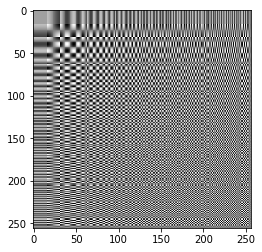

In [32]:
# 2.1
from scipy.fftpack import dct, idct
import matplotlib.pyplot as plt
import numpy as np

SIZE = 16

def dct_2D(matrix):
    # field <norm> is to set up normilization.
    # filed <axis> is to set which axis of the input data to do DCT.
    return dct(dct(matrix, axis=0, norm='ortho'), axis=1, norm='ortho')
def idct_2D(matrix):
    # field <norm> is to set up normilization.
    # filed <axis> is to set which axis of the input data to do DCT.
    return idct(idct(matrix, axis=0), axis=1)
def basis_plots(size):
    chunk = np.zeros((size, size))
    
    for i in range(size):
        for j in range(size):
            chunk[i][j] = 1
            if j == 0:
                temp_x = idct_2D(chunk)
            else:
                temp_x = np.append(temp_x, idct_2D(chunk), axis = 1)
            chunk[i][j] = 0        
        if i == 0:
            coeff = temp_x
        else:
            coeff = np.append(coeff, temp_x, axis = 0)  
            
    return coeff

plt.figure()
plt.imshow(basis_plots(SIZE), cmap='gray')


# The following is the definition way to solve this problem.

# # from scipy.fftpack import dct
# from functools import reduce
# from numpy import pi
# import operator
# import matplotlib.pyplot as plt
# import numpy as np
# from math import cos

# def norm_mat(matrix):
#     max_v = matrix.max()
#     min_v = matrix.min()
#     matrix = (matrix - min_v)/(max_v - min_v)
#     return matrix

# N = 16
# temp = []
# for u in range(0, N):
#     vec_1d = []
#     for x in range(0, N):
#         if u == 0:
#             item = pow(1/N, 0.5)
#         else:
#             item = pow(2/N, 0.5)
#         item = item*cos(pi*(2*x+1)*u/2/N)
#         vec_1d.append(item)
#     temp.append(vec_1d)
# mat_x = temp
# vec_x = reduce(operator.add, mat_x)
# vec_y = vec_x
# base = [[0] * len(vec_y) for i in range(len(vec_x))]
# for i in range(0, len(vec_x)):
#     for j in range(0, len(vec_y)):
#         base[i][j] = vec_x[i] * vec_y[j]
# base = np.mat(base)
# im = norm_mat(base)
# print(im)
# plt.imshow(im, cmap='gray')

<Figure size 432x288 with 0 Axes>

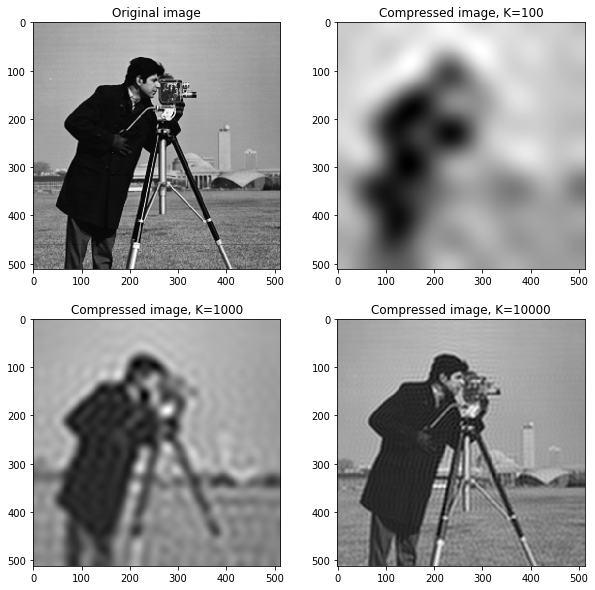

In [31]:
# 2.2
from scipy.fftpack import dct, idct
from skimage.color import rgb2gray
from skimage import data
import numpy as np
import matplotlib.pyplot as plt

img = rgb2gray(data.camera())


def dct_2D(matrix):
    # field <norm> is to set up normilization.
    # filed <axis> is to set which axis of the input data to do DCT.
    return dct(dct(matrix, axis=0), axis=1)
def idct_2D(matrix):
    # field <norm> is to set up normilization.
    # filed <axis> is to set which axis of the input data to do DCT.
    return idct(idct(matrix, axis=0), axis=1)
def compression(k, matrix):
    # parameter <k> is how many coefficients you would like to keep.
    # parameter <matrix> is the coefficient matrix of the image in frequency domain.
    rua_i = round(matrix.shape[0]/(pow(matrix.shape[0]*matrix.shape[1]/k, 0.5)))
    rua_j = round(matrix.shape[1]/(pow(matrix.shape[0]*matrix.shape[1]/k, 0.5)))
    tmp_matrix = matrix.copy()
    for i in range(tmp_matrix.shape[0]):
        for j in range(tmp_matrix.shape[1]):
            if (i > rua_i-1) or (j > rua_j-1):
                tmp_matrix[i][j] = 0
    return tmp_matrix


plt.figure()
plt.figure(figsize=(10, 10))
plt.subplot(2, 2, 1)
plt.imshow(img, cmap='gray')
plt.title('Original image')

dct_res = dct_2D(img)
compressed_img2 = idct_2D(compression(100, dct_res))
compressed_img3 = idct_2D(compression(1000, dct_res))
compressed_img4 = idct_2D(compression(10000, dct_res))

plt.subplot(2, 2, 2)
plt.imshow(compressed_img2, cmap='gray')
plt.title('Compressed image, K=100')
plt.subplot(2, 2, 3)
plt.imshow(compressed_img3, cmap='gray')
plt.title('Compressed image, K=1000')
plt.subplot(2, 2, 4)
plt.imshow(compressed_img4, cmap='gray')
plt.title('Compressed image, K=10000')
pass

##### 2.2 continued..
We have
$$F(u, v) = c(u)c(v)\sum_{i=0}^{N-1}\sum_{j=0}^{N-1}f(i, j)\cos[\frac{(i+0.5)\pi}{N}u]\cos[\frac{(j+0.5)\pi}{N}v]$$
where $f(i,j)$ is the input signal(in 2-D), $F(u, v)$ is the coefficients, and
$$ c(u)=\left\{
\begin{aligned}
\sqrt{\frac{1}{N}}, u=0 \\
\sqrt{\frac{2}{N}}, u!=0
\end{aligned}
\right.
$$
We can see the input image can be represented by the formula above, and the coefficients(consider their abs values) located at the top left corner have the greatest weight, which means they have the major component of the image.
So when we change the value of $k$, we maunually set those components(in transform domain) to zero to reduce some details.

The following is the inverse DCT transform.
$$f(i, j) = c(u)c(v)\sum_{i=0}^{N-1}\sum_{j=0}^{N-1}F(u, v)\cos[\frac{(i+0.5)\pi}{N}u]\cos[\frac{(j+0.5)\pi}{N}v]$$


### Exercise 3. Spectral Filtering (20 pts)

3.1 (10 pts) Implement low- and high-pass image filters by zeroing different ranges of the DCT coefficients you used in the previous exercise.

3.2 (10 pts) Show that convolving a 2D convolution kernel with an image is (approximately) equivalent to multiplying the transforms of the kernel and the image and then applying the inverse transform. You will need to center and pad the kernel so that the signals are the same size.

<Figure size 432x288 with 0 Axes>

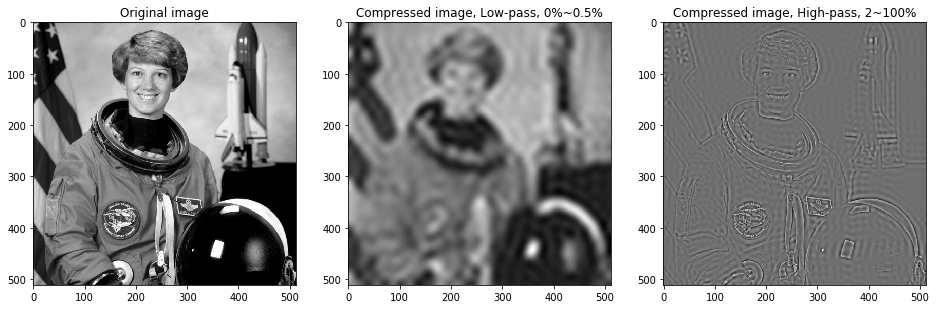

In [30]:
# 3.1
from scipy.fftpack import dct, idct
from skimage import data
from skimage.color import rgb2gray
import numpy as np
import matplotlib.pyplot as plt

img = rgb2gray(data.astronaut())


def dct_2D(matrix):
    # field <norm> is to set up normilization.
    # filed <axis> is to set which axis of the input data to do DCT.
    return dct(dct(matrix, axis=0), axis=1)
def idct_2D(matrix):
    # field <norm> is to set up normilization.
    # filed <axis> is to set which axis of the input data to do DCT.
    return idct(idct(matrix, axis=0), axis=1)
def compression(percent, matrix):
    # parameter <k> is how many coefficients you would like to keep.
    # parameter <matrix> is the coefficient matrix of the image in frequency domain.
    space = matrix.shape[0] * matrix.shape[1]
    k = space * percent
    rua_i = round(matrix.shape[0]/(pow(matrix.shape[0]*matrix.shape[1]/k, 0.5)))
    rua_j = round(matrix.shape[1]/(pow(matrix.shape[0]*matrix.shape[1]/k, 0.5)))
    tmp_matrix = matrix.copy()
    for i in range(tmp_matrix.shape[0]):
        for j in range(tmp_matrix.shape[1]):
            if (i > rua_i-1) or (j > rua_j-1):
                tmp_matrix[i][j] = 0
    return tmp_matrix
def selection(P, matrix):
    if P == 'L':
        L_matrix = compression(0.005, matrix)
        return L_matrix
    elif P == 'H':
        H_matrix = compression(1, matrix) - compression(0.02, matrix)
        return H_matrix
    else:
        print('Invalid insertion!')
        return None
    
plt.figure()
plt.figure(figsize=(16, 16))
plt.subplot(1, 3, 1)
plt.imshow(img, cmap='gray')
plt.title('Original image')

dct_res = dct_2D(img)
compressed_img2 = idct_2D(selection('L', dct_res))
compressed_img4 = idct_2D(selection('H', dct_res))

plt.subplot(1, 3, 2)
plt.imshow(compressed_img2, cmap='gray')
plt.title('Compressed image, Low-pass, 0%~0.5%')
plt.subplot(1, 3, 3)
plt.imshow(compressed_img4, cmap='gray')
plt.title('Compressed image, High-pass, 2~100%')
pass

(512, 512)
[255, 255]
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
[[205082.89761957 170204.27770845 169574.98864815 ... 166992.20263029
  164002.1914775  181246.62501823]
 [253285.86922666 231658.17451223 245813.8846923  ... 228158.50871452
  201743.19359996 200438.67929509]
 [347057.46210236 365139.286728   426984.00685133 ... 372427.60877956
  282188.88001779 240001.90077124]
 ...
 [497864.76667932 564062.98784067 676565.97772947 ... 591431.94418469
  432662.33734076 344954.03967086]
 [406701.40842014 402519.31118449 431101.15877049 ... 385954.15599005
  323567.8885796  294340.17653718]
 [369753.5713907  315679.96370956 285900.00816959 ... 277526.33832094
  284419.86393711 293359.16848583]]


Text(0.5, 1.0, 'reconstructed image')

<Figure size 432x288 with 0 Axes>

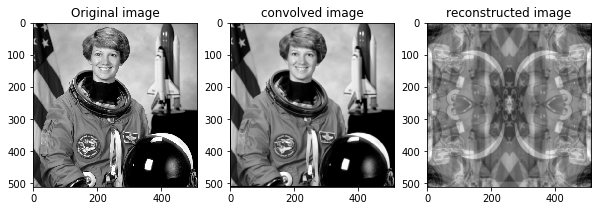

In [19]:
# 3.2
from scipy.fftpack import dct, idct
from skimage import data
from skimage.color import rgb2gray
import numpy as np
import matplotlib.pyplot as plt


img = rgb2gray(data.astronaut())
gaus5by5_filter_kernel = 1/256 * np.array(([1, 4, 6, 4, 1], 
                                           [4, 16, 24, 16, 4], 
                                           [6, 24, 36, 24, 6], 
                                           [4, 16, 24, 16, 4], 
                                           [1, 4, 6, 4, 1]))

def dct_2D(matrix):
    # field <norm> is to set up normilization.
    # filed <axis> is to set which axis of the input data to do DCT.
    return dct(dct(matrix, axis=0), axis=1)
def idct_2D(matrix):
    # field <norm> is to set up normilization.
    # filed <axis> is to set which axis of the input data to do DCT.
    return idct(idct(matrix, axis=0), axis=1)
def centering_kernel(kernel, image):
    blank_canvas = np.zeros((image.shape))
    blank_canvas1 = np.zeros((image.shape))
    print(blank_canvas.shape)
    centered_kernel = 0
    canvas_center = [int((blank_canvas.shape[0]-1)/2), int((blank_canvas.shape[1]-1)/2)]
    print(canvas_center)
    for i in range(kernel.shape[0]):
        for j in range(kernel.shape[1]):
            temp_x = int(canvas_center[0]+i - ((kernel.shape[0]-1)/2))
            temp_y = int(canvas_center[1]+j - ((kernel.shape[1]-1)/2))
            blank_canvas[temp_x][temp_y] = kernel[i][j]
    blank_canvas1[:kernel.shape[0], :kernel.shape[1]] = kernel
    return blank_canvas
def convolution(image, kernel):
    img_height = image.shape[0]
    img_width = image.shape[1]
    knl_height = kernel.shape[0]
    knl_width = kernel.shape[1]
    new_img = np.zeros((img_height, img_width))
    for i in range(knl_height-1, img_height-knl_height+1):
        for j in range(knl_width-1, img_width-knl_width+1):
            # For the image, i is row No., j is column No.
            tmp = 0
            for k in range(0, knl_height):
                for l in range(0, knl_width):
                    # For the kernel, k is row No., l is column No.
                    tmp += image[i+k-1][j+l-1] * kernel[k][l]
            new_img[i][j] = tmp
    return new_img
def tmp(pd_knl, ori_img):
    knl_dct = dct_2D(pd_knl)
    img_dct = dct_2D(ori_img)
    product = np.multiply(img_dct, knl_dct)
    rua_img = idct_2D(product)
    return rua_img

padded_kernel = centering_kernel(gaus5by5_filter_kernel, img)


convolved_img = convolution(img, gaus5by5_filter_kernel)
reconstructed_img = tmp(padded_kernel, img)
print(convolved_img)
print(reconstructed_img)
# print(dct_2D(img))

#centering_kernel(gaus5by5_filter_kernel, np.ones((7,7)))

plt.figure()
plt.figure(figsize=(10, 10))
plt.subplot(1, 3, 1)
plt.imshow(img, cmap='gray')
plt.title('Original image')
plt.subplot(1, 3, 2)
plt.imshow(convolved_img, cmap='gray')
plt.title('convolved image')
plt.subplot(1, 3, 3)
plt.imshow(reconstructed_img, cmap='gray')
plt.title('reconstructed image')

### Exploration (20 pts)

In these problems, you are meant to do creative exploration. Please read the rubric below.  This is meant to be open-ended; you should not feel the need to write a book chapter; but neither should you just change the numbers in one of the problems above.  After doing the readings and problems above, you should pick a concept you want to understand better or an simple modeling idea you want to try out.  You can also start to explore ideas for your project. 

Some other ideas:
- reproduce a figure from the readings
- derive or illustrate equations from the readings
- an exercise from the textbook (with explanation)

The general idea is for you to teach yourself (and potentially a classate) about a concept from the assignments and readings or solidify your understanding of required technical background.

In [2]:
# testing
from scipy.fftpack import dct, idct
import numpy as np

def dct_2D(matrix):
    # field <norm> is to set up normilization.
    # filed <axis> is to set which axis of the input data to do DCT.
    return dct(dct(matrix, axis=0, norm='ortho'), axis=1, norm='ortho')
def idct_2D(matrix):
    # field <norm> is to set up normilization.
    # filed <axis> is to set which axis of the input data to do DCT.
    return idct(idct(matrix, axis=0, norm='ortho'), axis=1, norm='ortho')
def convolution(image, kernel):
    img_height = image.shape[0]
    img_width = image.shape[1]
    knl_height = kernel.shape[0]
    knl_width = kernel.shape[1]
    new_img = np.zeros((img_height, img_width))
    for i in range(knl_height-1, img_height-knl_height+1):
        for j in range(knl_width-1, img_width-knl_width+1):
            # For the image, i is row No., j is column No.
            tmp = 0
            for k in range(0, knl_height):
                for l in range(0, knl_width):
                    # For the kernel, k is row No., l is column No.
                    tmp += image[i+k-1][j+l-1] * kernel[k][l]
            new_img[i][j] = tmp
    return new_img
def tmp(pd_knl, ori_img):
    knl_dct = dct_2D(pd_knl)
    img_dct = dct_2D(ori_img)
    product = np.dot(img_dct, knl_dct)
    rua_img = idct_2D(product)
    return rua_img
def centering_kernel(kernel, image):
    blank_canvas = np.zeros((image.shape[0], image.shape[1]))
    print(blank_canvas.shape)
    centered_kernel = 0
    canvas_center = [int((blank_canvas.shape[0]-1)/2), int((blank_canvas.shape[1]-1)/2)]
    print(canvas_center)
    for i in range(kernel.shape[0]):
        for j in range(kernel.shape[1]):
            temp_x = int(canvas_center[0]+i - ((kernel.shape[0]-1)/2))
            temp_y = int(canvas_center[1]+j - ((kernel.shape[1]-1)/2))
            blank_canvas[temp_x][temp_y] = kernel[i][j]
    return blank_canvas
def tmp(pd_knl, ori_img):
    knl_dct = dct_2D(pd_knl)
    img_dct = dct_2D(ori_img)
    product = np.dot(knl_dct, img_dct)
    rua_img = idct_2D(product)
    return rua_img

tupian = 100 * np.array(([1, 2, 3, 4, 5], 
                         [4, 5, 6, 7, 8], 
                         [7, 8, 9, 10, 11], 
                         [10, 11, 12, 13, 14], 
                         [13, 14, 15, 16, 17]))
he = 1/16 * np.array(([1, 2, 1], [2, 4, 2], [1, 2, 1]))
padded_he = centering_kernel(he, tupian)
print(tupian)
print(he)
print(convolution(tupian, he))

print(padded_he)
print(tmp(padded_he, tupian))



(5, 5)
[2, 2]
[[ 100  200  300  400  500]
 [ 400  500  600  700  800]
 [ 700  800  900 1000 1100]
 [1000 1100 1200 1300 1400]
 [1300 1400 1500 1600 1700]]
[[0.0625 0.125  0.0625]
 [0.125  0.25   0.125 ]
 [0.0625 0.125  0.0625]]
[[  0.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0.]
 [  0.   0. 900.   0.   0.]
 [  0.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0.]]
[[0.     0.     0.     0.     0.    ]
 [0.     0.0625 0.125  0.0625 0.    ]
 [0.     0.125  0.25   0.125  0.    ]
 [0.     0.0625 0.125  0.0625 0.    ]
 [0.     0.     0.     0.     0.    ]]
[[-4.16340996e-14 -4.66279225e-14 -5.08422995e-14 -5.50566764e-14
  -6.00504993e-14]
 [ 1.75000000e+02  2.00000000e+02  2.25000000e+02  2.50000000e+02
   2.75000000e+02]
 [ 3.50000000e+02  4.00000000e+02  4.50000000e+02  5.00000000e+02
   5.50000000e+02]
 [ 1.75000000e+02  2.00000000e+02  2.25000000e+02  2.50000000e+02
   2.75000000e+02]
 [-4.97405746e-14 -5.72313089e-14 -6.35528743e-14 -6.98744398e-14
  -7.73651741e-14]]


#### Exploration Grading Rubric

Exploration problems will be graded according the elements in the table below.  The scores in the column headers indicate the number of points possible for each rubric element (given in the rows).  A score of zero for an element is possible if it is missing entirely.

|   Element  | Substandard (+1) | Basic (+2) | Good (+3) | Excellent (+5) |
| :-- | :----------- | :---- | :--- | :-------- |
| <b> Pedagogical Value </b> | No clear statement of idea or concept being explored or explained; lack of motivating questions. | Simple problem with adequate motivation; still could be a useful addition to an assignment. | Good choice of problem with effective illustrations of concept(s).  Demonstrates a deeper level of understanding. | Problem also illustrates or clarifies common conceptual difficulties or misconceptions. |
| <b> Novelty of Ideas </b> | Copies existing problem or makes only a trivial modification; lack of citation(s) for source of inspiration. | Concepts are similar to those covered in the assignment but with some modifications of an existing exericse. | Ideas have clear pedagogical motivation; creates different type of problem or exercise to explore related or foundational concepts more deeply. | Applies a technique or explores concept not covered in the assignment or not discussed at length in lecture. |
| <b> Clarity of Explanation </b> | Little or confusing explanation; figures lack labels or useful captions; no explanation of motivations. | Explanations are present, but unclear, unfocused, wordy or contain too much technical detail. | Clear and concise explanations of key ideas and motivations. | Also clear and concise, but includes illustrative figures; could be read and understood by students from a variety of backgrounds. |
| <b> Depth of Exploration </b> | Content is obvious or closely imitates assignment problems. | Uses existing problem for different data. | Applies a variation of a technique to solve a problem with an interesting motivation; explores a concept in a series of related problems. | Applies several concepts or techniques; has clear focus of inquiry that is approached from multiple directions.|


In [14]:
a = np.array(([1, 2, 1], [2, 4, 2], [1, 2, 3]))
b = np.array(([1, 2, 3], [4, 5, 6], [7, 8, 9]))
print(np.multiply(a,b))

[[ 1  4  3]
 [ 8 20 12]
 [ 7 16 27]]
